<a href="https://colab.research.google.com/github/JuanGutierrezP/Juan_Guti-rrez-Joseph_Reyes/blob/main/Tarea_Integraci%C3%B3nsem7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#Punto 5
import numpy as np

# Definir la función a integrar
def f(x):
    return np.exp(-x**2)

# Definir la segunda derivada de f(x)
def f_double_prime(x):
    return np.exp(-x**2) * (4*x**2 - 2)

# Función para calcular el máximo de |f''(x)| en el intervalo [a, b]
def max_f_double_prime(a, b):
    # Generamos una gran cantidad de puntos para estimar el máximo
    x = np.linspace(a, b, 1000)
    f_pp = np.abs(f_double_prime(x))
    return np.max(f_pp)

# Implementación del método del trapecio
def metodo_trapecio(f, a, b, n):
    h = (b - a) / n  # Ancho de los subintervalos
    x = np.linspace(a, b, n + 1)  # Puntos equiespaciados en [a, b]
    fx = f(x)
    integral = (h / 2) * (fx[0] + 2 * np.sum(fx[1:-1]) + fx[-1])
    return integral

# Datos iniciales
a = 0
b = 1
error_deseado = 0.005

# Calcular el número mínimo de intervalos n
M = max_f_double_prime(a, b)
n = int(np.ceil(np.sqrt(((b - a)**3 * M) / (12 * error_deseado))))

print(f"Número de intervalos necesarios: n = {n}")


integral_aprox = metodo_trapecio(f, a, b, n)

print(f"Valor aproximado de la integral: {integral_aprox:.5f}")

# Valor exacto utilizando la función de error (erf)
valor_exacto = (np.sqrt(np.pi) / 2) * np.math.erf(1)

# Cálculo del error absoluto
error_real = np.abs(valor_exacto - integral_aprox)

print(f"Valor exacto de la integral: {valor_exacto:.5f}")
print(f"Error real: {error_real:.5f}")


Número de intervalos necesarios: n = 6
Valor aproximado de la integral: 0.74512
Valor exacto de la integral: 0.74682
Error real: 0.00170


<ipython-input-31-8425c40a1164>:44: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  valor_exacto = (np.sqrt(np.pi) / 2) * np.math.erf(1)


In [32]:
#Punto 6

import numpy as np

# Parámetros
R = 0.5     # cm
a = 0.01    # cm


def f(x, a, R):
    return np.sqrt(a**2 - x**2) / (R + x)

# Método del trapecio
def metodo_trapecio(f, a_lim, b_lim, n, a, R):
    h = (b_lim - a_lim) / n
    suma = 0.5 * f(a_lim, a, R) + 0.5 * f(b_lim, a, R)
    for i in range(1, n):
        x_i = a_lim + i * h
        suma += f(x_i, a, R)
    return h * suma

# Regla de Simpson 1/3
def regla_simpson(f, a_lim, b_lim, n, a, R):
    if n % 2 != 0:
        n += 1  # Simpson requiere n par
    h = (b_lim - a_lim) / n
    suma = f(a_lim, a, R) + f(b_lim, a, R)
    for i in range(1, n):
        x_i = a_lim + i * h
        coef = 4 if i % 2 != 0 else 2
        suma += coef * f(x_i, a, R)
    return (h / 3) * suma

# Valor exacto de la integral
I_exacto = np.pi * (R - np.sqrt(R**2 - a**2))

# Límites de integración
a_lim = -a
b_lim = a

# Error permitido
error_permitido = 0.5  # Porcentaje

# Método del trapecio
n_trapecio = 2
error_trapecio = 100
while error_trapecio > error_permitido:
    I_trapecio = metodo_trapecio(f, a_lim, b_lim, n_trapecio, a, R)
    error_trapecio = abs((I_trapecio - I_exacto) / I_exacto) * 100
    n_trapecio += 2

# Regla de Simpson
n_simpson = 2
error_simpson = 100
while error_simpson > error_permitido:
    I_simpson = regla_simpson(f, a_lim, b_lim, n_simpson, a, R)
    error_simpson = abs((I_simpson - I_exacto) / I_exacto) * 100
    n_simpson += 2

# Resultados
print(f"Valor exacto de la integral: {I_exacto:.12f}")
print("\nMétodo del Trapecio:")
print(f" - Número de subintervalos (n): {n_trapecio}")
print(f" - Valor aproximado: {I_trapecio:.12f}")
print(f" - Error porcentual: {error_trapecio:.6f}%")

print("\nRegla de Simpson 1/3:")
print(f" - Número de subintervalos (n): {n_simpson}")
print(f" - Valor aproximado: {I_simpson:.12f}")
print(f" - Error porcentual: {error_simpson:.6f}%")


Valor exacto de la integral: 0.000314190688

Método del Trapecio:
 - Número de subintervalos (n): 38
 - Valor aproximado: 0.000312652799
 - Error porcentual: 0.489476%

Regla de Simpson 1/3:
 - Número de subintervalos (n): 22
 - Valor aproximado: 0.000312731632
 - Error porcentual: 0.464385%


In [35]:
# Punto 7

import numpy as np

def calcular_volumen(n):
    R = 1.0
    # Crear una grilla entre -R y R con n+1 puntos en cada eje
    x = np.linspace(-R, R, n+1)
    y = np.linspace(-R, R, n+1)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    area = dx * dy
    volumen = 0.0
    for i in range(n):
        for j in range(n):
            # Coordenadas de los cuatro vértices del cuadrado pequeño
            xi0 = x[i]
            xi1 = x[i+1]
            yj0 = y[j]
            yj1 = y[j+1]
            puntos = [(xi0, yj0), (xi1, yj0), (xi0, yj1), (xi1, yj1)]
            valores_z = []
            for (xi, yj) in puntos:
                # toca calcular el argumento de la raíz cuadrada
                arg = R**2 - xi**2 - yj**2

                if arg >= 0:
                    z = np.sqrt(np.maximum(0, arg))
                else:
                    z = 0.0
                valores_z.append(z)

            z_promedio = sum(valores_z) / 4.0
            # Multiplicar por el área del cuadrado pequeño y sumar al volumen total
            volumen += z_promedio * area
    return volumen

# Volumen exacto de la semiesfera para comparación
R = 1.0
V_exacto = (2.0/3.0) * np.pi * R**3

# Calcular y mostrar el volumen para diferentes valores de n cualesquiera
for n in [10, 20, 40, 80, 160]:
    V_numerico = calcular_volumen(n)
    error = abs(V_numerico - V_exacto)
    print(f"n = {n}, volumen numérico = {V_numerico:.6f}, Error de cada una= {error:.6e}")



n = 10, volumen numérico = 2.017398, Error de cada una= 7.699748e-02
n = 20, volumen numérico = 2.080695, Error de cada una= 1.370039e-02
n = 40, volumen numérico = 2.091777, Error de cada una= 2.618465e-03
n = 80, volumen numérico = 2.093945, Error de cada una= 4.499396e-04
n = 160, volumen numérico = 2.094148, Error de cada una= 2.474086e-04


In [ ]:
#Punto 9
import sympy as sp

# Definir variables simbólicas
x, a, b = sp.symbols('x a b')
h = (b - a) / 3

# Puntos de interpolación
x0 = a
x1 = a + h
x2 = a + 2*h
x3 = b

# Valores de la función en los puntos
f0 = sp.Function('f')(x0)
f1 = sp.Function('f')(x1)
f2 = sp.Function('f')(x2)
f3 = sp.Function('f')(x3)


x_values = [x0, x1, x2, x3]
f_values = [f0, f1, f2, f3]

# Calcular las funciones cardinales L_i(x)
L = []
for i in range(4):
    numerator = 1
    denominator = 1
    for j in range(4):
        if i != j:
            numerator *= (x - x_values[j])
            denominator *= (x_values[i] - x_values[j])
    L_i = (numerator / denominator).simplify()
    L.append(L_i)

# Aproximación de f(x) mediante el polinomio interpolador
P = sum(f_values[i] * L[i] for i in range(4))

# Calcular la integral aproximada
integral_approx = sp.integrate(P, (x, a, b)).simplify()

# Expresión final de la integral aproximada
expr = integral_approx.factor()


print("a) La integral aproximada es:")
sp.pprint(expr)

# Verificar que coincide
simplified_expr = ((3*h)/8)*(f0 + 3*f1 + 3*f2 + f3)
print("\nVerificación de la fórmula:")
sp.pprint(simplified_expr)


print("\n¿Las expresiones son iguales?")
print(sp.simplify(expr - simplified_expr) == 0)

x1_simplified = (a + h).simplify()
x2_simplified = (a + 2*h).simplify()

print("\nb) Los puntos intermedios son:")
print("x1 =", x1_simplified, "=", sp.simplify((2*a + b)/3))
print("x2 =", x2_simplified, "=", sp.simplify((a + 2*b)/3))


a) La integral aproximada es:
         ⎛                 ⎛a   2⋅b⎞      ⎛2⋅a   b⎞⎞ 
-(a - b)⋅⎜f(a) + f(b) + 3⋅f⎜─ + ───⎟ + 3⋅f⎜─── + ─⎟⎟ 
         ⎝                 ⎝3    3 ⎠      ⎝ 3    3⎠⎠ 
─────────────────────────────────────────────────────
                          8                          

Verificación de la fórmula:
⎛  a   b⎞ ⎛                 ⎛a   2⋅b⎞      ⎛2⋅a   b⎞⎞
⎜- ─ + ─⎟⋅⎜f(a) + f(b) + 3⋅f⎜─ + ───⎟ + 3⋅f⎜─── + ─⎟⎟
⎝  8   8⎠ ⎝                 ⎝3    3 ⎠      ⎝ 3    3⎠⎠

¿Las expresiones son iguales?
True

b) Los puntos intermedios son:
x1 = 2*a/3 + b/3 = 2*a/3 + b/3
x2 = a/3 + 2*b/3 = a/3 + 2*b/3


In [ ]:
#Punto 10
import numpy as np
from scipy import integrate  # Importar el método correcto

# Define the function
def integral_libro(x, h):
    return (x**4) - (6*x**3*h)+ (11*x**2*h**2) - (6*x*h**3)
def f_fourth_derivative(x, h):
    return 24*x - 72*h
def integral_wrapper(h):
    def inner_integral(x):
        return integral_libro(x, h)
    I, _ = integrate.quad(inner_integral, 0, 3*h)
    xi = 1.5*h
    f_fourth_derivative_val = f_fourth_derivative(xi, h)
    E = (3*h**4 / 80) * np.abs(f_fourth_derivative_val)
    return E
h = 0.1
Error = integral_wrapper(h)
print("El error es:", Error)

El error es: 1.3500000000000001e-05


In [34]:
#Punto 15
#aproximación cuadratura Gaussiana
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

def gauss_cuadratura(n):
    x, w = roots_legendre(n)
    return x, w

n = 20
x, w = gauss_cuadratura(n)
print("Ceros del polinomio de Legendre hasta", n, ": ", x)
print("Pesos de ponderación de Gaus hasta ",n,":", w)

Ceros del polinomio de Legendre hasta 20 :  [-0.9931286  -0.96397193 -0.91223443 -0.83911697 -0.74633191 -0.63605368
 -0.510867   -0.37370609 -0.22778585 -0.07652652  0.07652652  0.22778585
  0.37370609  0.510867    0.63605368  0.74633191  0.83911697  0.91223443
  0.96397193  0.9931286 ]
Pesos de ponderación de Gaus hasta  20 : [0.01761401 0.04060143 0.06267205 0.08327674 0.10193012 0.11819453
 0.13168864 0.14209611 0.14917299 0.15275339 0.15275339 0.14917299
 0.14209611 0.13168864 0.11819453 0.10193012 0.08327674 0.06267205
 0.04060143 0.01761401]


In [36]:
#Punto 16
import numpy as np
from scipy.special import roots_legendre

def f(x):
    return 1 / (x**4 + 1)

def transformed_f(t):
    return (1 - t)*2 / ((t + 1)*4 + (1 - t)*4)

# intervalo [-1, 1]
def integral_part1(n):
    x, w = roots_legendre(n)
    inter_t_x = (x + 1) / (1 - x)  # Transformar el intervalo
    return np.sum(w * f(inter_t_x) / (1 - x)**2)

# intervalo [0, infinito]
def integral_part2(n):
    x, w = roots_legendre(n)
    transformed_x = 1 / x
    return np.sum(w * f(transformed_x) / (x**2 * transformed_x**2))

n = 10

# Calcular cada parte de la integral
approximation_part1 = integral_part1(n)
approximation_part2 = integral_part2(n)


approximation = approximation_part1 + approximation_part2
print("Integral Aproximada:", approximation)

Integral Aproximada: 0.8211831705366135


Aproximación:  0.37767456152975504


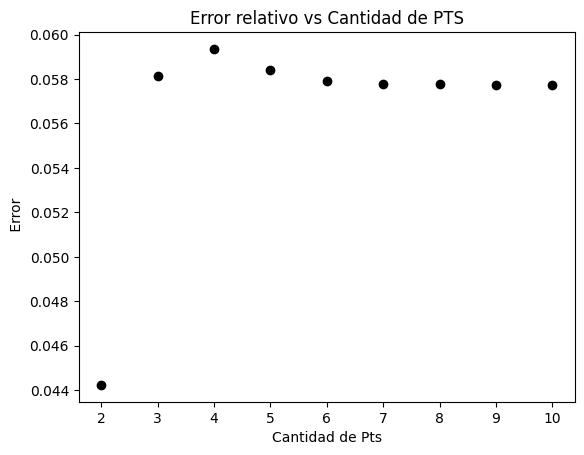

In [37]:
#Punto 17
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_laguerre

def f(x):
    return x**3 * np.exp(-x)

def gauss_laguerre(n):
    roots, peso_p = roots_laguerre(n)
    return roots, peso_p

def estimate_integral(n):
    roots, peso_p = gauss_laguerre(n)
    integral = np.sum(peso_p * f(roots))
    return integral

n = 3

res_int = estimate_integral(n)
print("Aproximación: ", res_int)
resultado_real = np.pi**4 / 15
puntos = range(2, 11)
error_relativo = []
for n in puntos:
    aproxim = estimate_integral(n)
    relative_error = np.abs(aproxim /resultado_real)
    error_relativo.append(relative_error)
plt.scatter(puntos, error_relativo, color="k")
plt.xlabel('Cantidad de Pts')
plt.ylabel(' Error')
plt.title('Error relativo vs Cantidad de PTS')
plt.show()

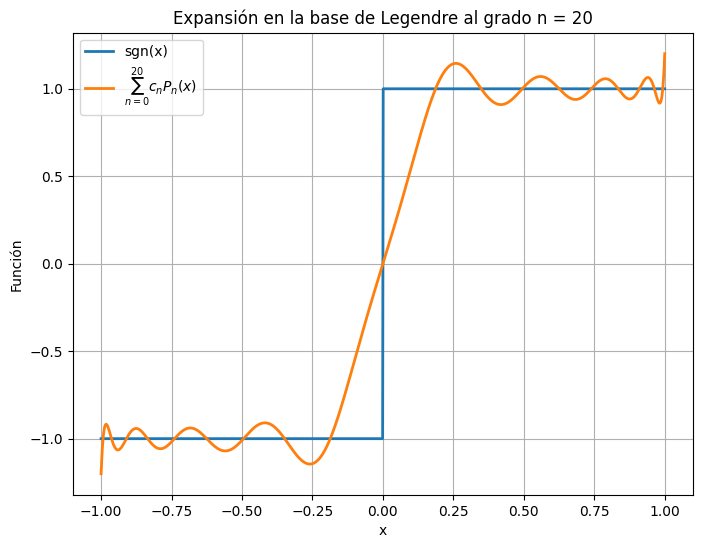

In [39]:
#Punto 21
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre, legendre

# (b) Implementar la función sgn(x)
def sgn(x):
    return np.sign(x)


x_domain = np.linspace(-1, 1, 1000)
f_x = sgn(x_domain)

# (d) Definir los puntos y pesos de Gauss-Legendre al grado n = 15
n_quad = 15
x_quad, w_quad = roots_legendre(n_quad)

N = 20
P = [legendre(n) for n in range(N + 1)]  # Lista de polinomios de Legendre


def calcular_coeficientes(N, x_quad, w_quad, f):
    c = np.zeros(N + 1)
    for n in range(N + 1):
        Pn_x = P[n](x_quad)
        integrando = f(x_quad) * Pn_x
        integral = np.dot(w_quad, integrando)
        c[n] = (2 * n + 1) / 2 * integral
    return c

# Calcular los coeficientes
c_n = calcular_coeficientes(N, x_quad, w_quad, sgn)

# (g) Calcular la combinación lineal para cada valor del dominio
f_aprox = np.zeros_like(x_domain)
for n in range(N + 1):
    Pn_x_domain = P[n](x_domain)
    f_aprox += c_n[n] * Pn_x_domain

# (h) Dibujar la representación en la base de Legendre
plt.figure(figsize=(8, 6))
plt.plot(x_domain, f_x, label='sgn(x)', linewidth=2)
plt.plot(x_domain, f_aprox, label=r'$\sum_{n=0}^{%d} c_n P_n(x)$' % N, linewidth=2)
plt.title('Expansión en la base de Legendre al grado n = %d' % N)
plt.xlabel('x')
plt.ylabel('Función')
plt.grid(True)
plt.legend()
plt.show()


In [38]:
# Bono video, cuadratura adaptativa

def f(x):
  return ((x**10) - 10*x**8 + 33*x**6 - 40*x**4 + 16*x**2)

# toca dos diferentes funciones

def adaptive_quadrature(f, a, b, tol=1e-6, max_recursion_depth=20):
    def adaptive_simpson(f, a, b, fa, fb, fm, I, tol, depth):
        # Calcular los puntos intermedios
        m = (a + b) / 2
        h = b - a
        lm = (a + m) / 2
        rm = (m + b) / 2
        flm = f(lm)
        frm = f(rm)

        # Calcular las integrales en los subintervalos
        I1 = (h / 6) * (fa + 4*fm + fb)
        I2 = (h / 12) * (fa + 4*flm + 2*fm + 4*frm + fb)

        # Estimar el error
        error = np.abs(I2 - I1)

        if error < 15 * tol or depth >= max_recursion_depth:
            return I2 + (I2 - I1) / 15  # Corrección de Romberg
        else:

            left = adaptive_simpson(f, a, m, fa, fm, flm, I1, tol/2, depth+1)
            right = adaptive_simpson(f, m, b, fm, fb, frm, I1, tol/2, depth+1)
            return left + right

    fa = f(a)
    fb = f(b)
    fm = f((a + b) / 2)
    initial_I = (b - a) * (fa + 4*fm + fb) / 6
    return adaptive_simpson(f, a, b, fa, fb, fm, initial_I, tol, 0)

# Definir la función de Simpson
def simpson(f, a, b):
    h = (b - a) / 2
    x0 = a
    x1 = a + h
    x2 = b
    return h / 3 * (f(x0) + 4 * f(x1) + f(x2))

#usamos el intervalo a probar
a = 0
b = 2
I = adaptive_quadrature(f, a, b)
print("Valor aproximado de la integral en [0, 2]:", I)

Valor aproximado de la integral en [0, 2]: 7.388167381026417
